In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
economy = pd.read_csv('economy.csv').drop('Entity', axis=1)
emission = pd.read_csv('emission.csv').drop('Entity', axis=1)

economy_dict = economy.groupby('Code').apply(lambda x: x.set_index('Year')['GDP Per Capita'].to_dict()).to_dict()
emission_dict = emission.groupby('Code').apply(lambda x: x.set_index('Year')['CO2 Emissions Per Capita'].to_dict()).to_dict()

C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\551079040.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  economy_dict = economy.groupby('Code').apply(lambda x: x.set_index('Year')['GDP Per Capita'].to_dict()).to_dict()
C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\551079040.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emission_dict = emission.groupby('Code').apply(lambda x: x.set_index('Ye

In [3]:
max_k = 20
degree_of_polynomial = 3
x1 = []
y1 = []
ks = []
countries = []
gs = {}

for country in economy_dict.keys():
    x = []
    y = []
    ktemp = 0
    min_correlation = 5
    for k in range(1, max_k + 1):
        xtemp = []
        ytemp = []
        try:
            for year in economy_dict[country].keys():
                if (year + k) in emission_dict[country].keys() and year in emission_dict[country].keys() and emission_dict[country][year] != 0:
                    xtemp.append(economy_dict[country][year])
                    ytemp.append((emission_dict[country][year + k] - emission_dict[country][year]) / emission_dict[country][year])
            if country not in gs.keys():
                gs[country] = {}
            gs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
        except:
            pass
        if (np.corrcoef(xtemp, ytemp)[0, 1] < min_correlation and len(xtemp) > 5):
            min_correlation = np.corrcoef(xtemp, ytemp)[0, 1]
            x = xtemp
            y = ytemp
            ktemp = k
    x1.append(x)
    y1.append(y)
    ks.append(ktemp)
    countries.append(country)

C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1509840870.py:24: RankWarning: Polyfit may be poorly conditioned
  gs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1509840870.py:24: RankWarning: Polyfit may be poorly conditioned
  gs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1509840870.py:24: RankWarning: Polyfit may be poorly conditioned
  gs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
c:\Users\kahns\Anaconda3\envs\climax\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\kahns\Anaconda3\envs\climax\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np

In [4]:
print(len(x1), len(y1), len(ks), len(countries))

195 195 195 195


In [5]:
# fig, axes = plt.subplots(nrows=39, ncols=5, figsize=(20, 152))
# for row in range(39):
#     for col in range(5):
#         axes[row, col].scatter(x1[row * 5 + col], y1[row * 5 + col])
#         axes[row, col].set_title(f'{countries[row * 5 + col]}: k = {ks[row * 5 + col]}')

# plt.tight_layout()

# plt.show()

In [6]:
print(emission_dict['ABW'][1930])

9.935253


In [7]:
max_k = 20
degree_of_polynomial = 3
x2 = []
y2 = []
ks = []
countries = []
fs = {}

for country in economy_dict.keys():
    x = []
    y = []
    ktemp = 0
    min_correlation = -100
    for k in range(1, max_k + 1):
        xtemp = []
        ytemp = []
        try:
            for year in emission_dict[country].keys():
                if year + k in economy_dict[country].keys() and year in economy_dict[country].keys() and economy_dict[country][year] != 0:
                    xtemp.append(emission_dict[country][year])
                    ytemp.append(abs((economy_dict[country][year + k] - economy_dict[country][year])) / economy_dict[country][year])
            if country not in fs.keys():
                fs[country] = {}
            fs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
            if (np.corrcoef(xtemp, ytemp)[0, 1] > min_correlation):
                min_correlation = np.corrcoef(xtemp, ytemp)[0, 1]
                x = xtemp
                y = ytemp
                ktemp = k
        except:
            pass

    x2.append(x)
    y2.append(y)
    ks.append(ktemp)
    countries.append(country)

C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1474285126.py:24: RankWarning: Polyfit may be poorly conditioned
  fs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1474285126.py:24: RankWarning: Polyfit may be poorly conditioned
  fs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1474285126.py:24: RankWarning: Polyfit may be poorly conditioned
  fs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1474285126.py:24: RankWarning: Polyfit may be poorly conditioned
  fs[country][k] = [np.polyfit(xtemp, ytemp, degree_of_polynomial).tolist(), np.corrcoef(xtemp, ytemp)[0, 1]]
C:\Users\kahns\AppData\Local\Temp\ipykernel_12152\1474285126.py:24: RankWarning: Polyfit may be poor

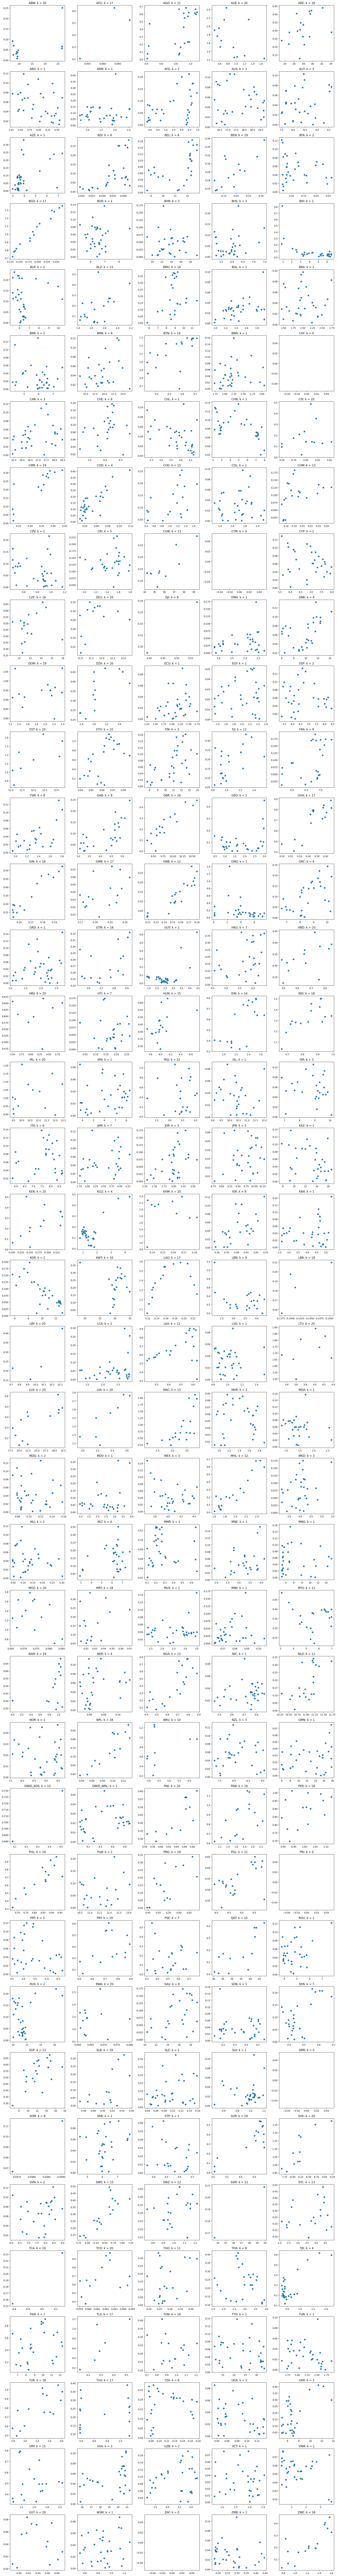

In [8]:
fig, axes = plt.subplots(nrows=39, ncols=5, figsize=(20, 152))
for row in range(39):
    for col in range(5):
        axes[row, col].scatter(x2[row * 5 + col], y2[row * 5 + col])
        axes[row, col].set_title(f'{countries[row * 5 + col]}: k = {ks[row * 5 + col]}')

plt.tight_layout()

plt.show()

In [9]:
with open('fs.json', 'w') as f:
    json.dump(fs, f)

with open('gs.json', 'w') as g:
    json.dump(gs, g)